In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

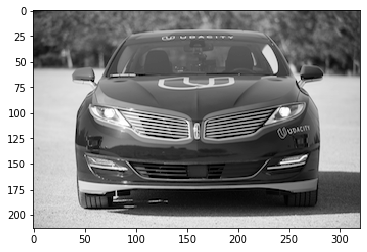

In [2]:
img_path="images/udacity_sdc.png"

bgr_image = cv2.imread(img_path)

gray_image = cv2.cvtColor(bgr_image,cv2.COLOR_BGR2GRAY)

gray_image = gray_image.astype("float32")/255

plt.imshow(gray_image,cmap="gray")

plt.show()

In [3]:
import numpy as np
filter_values = np.array([[-1,-1,1,1],
                         [-1,-1,1,1],
                         [-1,-1,1,1],
                         [-1,-1,1,1]])
print("Filter Shape:",filter_values.shape)


Filter Shape: (4, 4)


In [4]:
filter_1 = filter_values
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = - filter_3

filters = np.array([filter_1,filter_2,filter_3,filter_4])

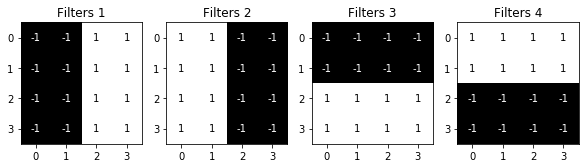

In [7]:
fig = plt.figure(figsize=(10,5))
for i in range(4):
    ax = fig.add_subplot(1,4,i+1)
    ax.imshow(filters[i],cmap="gray")
    ax.set_title("Filters %s" %str(i+1))
    width,height = filters[i].shape
    
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self,weight):
        super(Net,self).__init__()
        k_height,k_width = weight.shape[2:]
        self.cov = nn.Conv2d(1,4,kernel_size=(k_height,k_width),bias=False)
        
    def forward(self,x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        return conv_x,activated_x
    
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

model=Net(weight)

print(model)
    

Net(
  (cov): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)
